In [112]:
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from tqdm import tqdm

In [66]:
cats = pd.read_csv(
    "../data/reuters/cats.txt",
    header=None,
)

In [67]:
with open("../data/reuters/cats.txt", mode="r") as f:
    text = f.read()

In [68]:
lines = text.split("\n")

In [69]:
cats = []
for line in lines:
    cats.append(line.split(" "))

In [70]:
categories = set()
for cat in cats:
    categories.update(set(cat[1:]))

In [83]:
texts = dict()
for cat in tqdm(cats):
    dataPath = f'../data/reuters/{cat[0]}'
    with open(dataPath, mode="r", errors="ignore") as f:
        text = f.read().split(' ')
        texts[cat[0]] = text

100%|██████████| 10788/10788 [00:19<00:00, 563.16it/s]


In [84]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(texts.values())]

In [85]:
model = Doc2Vec(documents, vector_size=2, window=5, min_count=1, workers=2)

In [91]:
vectors = dict()
for idx, text in tqdm(texts.items()):
    vectors[idx]=model.infer_vector(text)

100%|██████████| 10788/10788 [01:38<00:00, 109.66it/s]


In [101]:
mat = np.vstack(vectors.values())

/tmp/ipykernel_72706/879069550.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mat = np.vstack(vectors.values())


<AxesSubplot: >

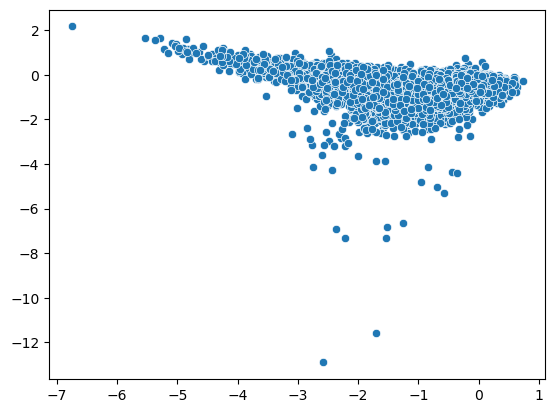

In [111]:
sns.scatterplot(x=mat[:, 0], y=mat[:, 1])

In [115]:
kmeans = KMeans(n_clusters=10)

In [117]:
pred = kmeans.fit(mat)

In [118]:
pred = kmeans.fit_predict(mat)

In [119]:
pred

array([7, 2, 5, ..., 2, 0, 3], dtype=int32)